In [2]:
import pandas as pd

# Carregando o arquivo CSV
importacao_vinhos_de_mesa = pd.read_csv('dados/Importacao - Vinhos de Mesa.csv',
  encoding='UTF-8',
  sep=r'[;\t]',
  decimal=',',
  thousands='.',
  quotechar='"',
  engine='python')


In [3]:
# Selecionar Colunas de Valor USD (Terminam com '.1')
valor_anual = [col for col in importacao_vinhos_de_mesa if col.endswith('.1')]

# DataFrame de Valor Importado
importado_por_ano_usd = importacao_vinhos_de_mesa[['País'] + valor_anual].copy()
importado_por_ano_usd.columns = importado_por_ano_usd.columns.str.replace('.1', '', regex=False)

for col in importado_por_ano_usd.columns[1:]:
  importado_por_ano_usd[col] = pd.to_numeric(importado_por_ano_usd[col], errors='coerce')


In [ ]:
# Divisão de Eixo 100.000
importado_por_ano_usd_indexado = importado_por_ano_usd.set_index('País') / 100_000

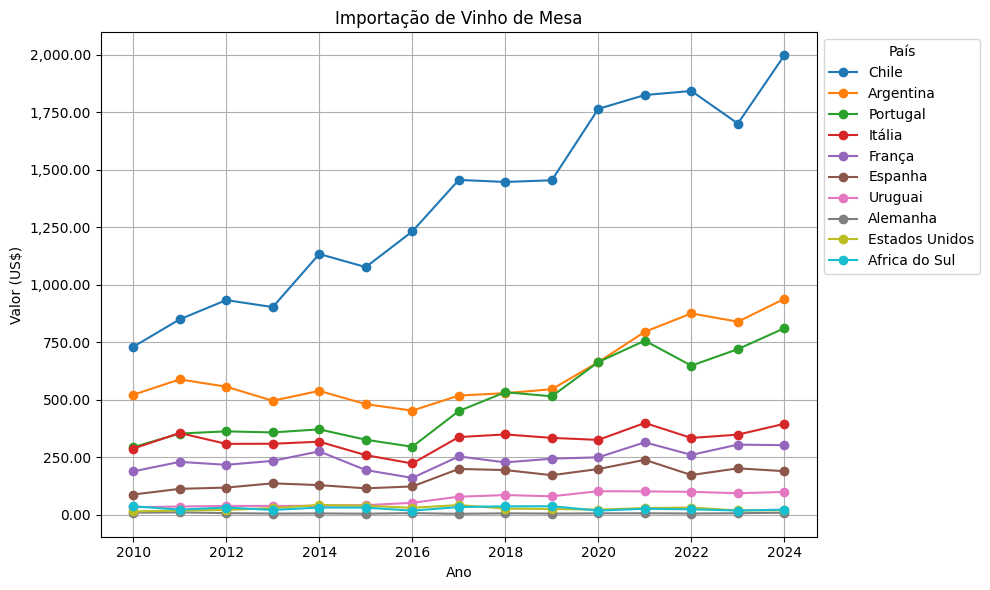

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Gráfico de Valor importado por Ano por País
fig, ax = plt.subplots(figsize=(10, 6))


# Ultimos 15 anos
anos = [int(col) for col in importado_por_ano_usd_indexado.columns]
anos_recentes = [str(ano) for ano in anos if ano >= max(anos) - 14]
ultimos_15_anos= importado_por_ano_usd_indexado[anos_recentes]


# TOP 10 Países
top10_paises = importado_por_ano_usd_indexado.sum(axis=1).nlargest(10).index
df_top_10_ultimos15 = ultimos_15_anos.loc[top10_paises]

# Plotando o Gráfico (agora corretamente com os top 20)
df_top_10_ultimos15.T.plot(ax=ax, marker='o')

# Formatação de Valores
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Formatação Visual
plt.title('Importação de Vinho de Mesa')
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.legend(title='País', loc='best', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()
